<a href="https://colab.research.google.com/github/MarianVelasquez/Sentiment-Analysis-and-Text-Mining/blob/main/Assigment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

📍 Part 1: Data Loading and Basic Exploration

In [8]:
#• Load the dataset using pandas.
import pandas as pd
df=pd.read_csv('Data_Train.csv')
#• Display the first 5 and last 5 rows.
df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
#• Check for null/missing values and handle them appropriately.
df.isnull().sum()


,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [13]:
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [14]:
#• Display basic information and summary statistics of the dataset.
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


📍 Part 2: Data Cleaning and Preprocessing

In [15]:
#• Convert Date_of_Journey, Dep_Time, and Arrival_Time to datetime formats.
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

df.head(5)

/tmp/ipython-input-1071861270.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
/tmp/ipython-input-1071861270.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
/tmp/ipython-input-1071861270.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2025-08-06 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2025-08-06 05:50:00,2025-08-06 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2025-08-06 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2025-08-06 18:05:00,2025-08-06 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2025-08-06 16:50:00,2025-08-06 21:35:00,4h 45m,1 stop,No info,13302


In [16]:
#• Extract features such as: Journey day and month, Hour and minute from departure and arrival times.
df['Journey_Day']=df['Date_of_Journey'].dt.day
df['Journey_Month']=df['Date_of_Journey'].dt.month
df['Dep_Hour']=df['Dep_Time'].dt.hour
df['Dep_Minute']=df['Dep_Time'].dt.minute
df.head(5)



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2025-08-06 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2025-08-06 05:50:00,2025-08-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2025-08-06 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2025-08-06 18:05:00,2025-08-06 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2025-08-06 16:50:00,2025-08-06 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
#• Convert Duration into minutes (or hours).
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2025-08-06 22:20:00,2025-03-22 01:10:00,170,non-stop,No info,3897,24,3,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2025-08-06 05:50:00,2025-08-06 13:15:00,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2025-08-06 09:25:00,2025-06-10 04:25:00,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2025-08-06 18:05:00,2025-08-06 23:30:00,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2025-08-06 16:50:00,2025-08-06 21:35:00,285,1 stop,No info,13302,1,3,16,50


In [18]:
#• Encode categorical features using suitable encoding techniques.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df['Total_Stops']=le.fit_transform(df['Total_Stops'])
df.head(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,3,2019-03-24,0,5,BLR ? DEL,2025-08-06 22:20:00,2025-03-22 01:10:00,170,4,8,3897,24,3,22,20
1,1,2019-05-01,3,0,CCU ? IXR ? BBI ? BLR,2025-08-06 05:50:00,2025-08-06 13:15:00,445,1,8,7662,1,5,5,50
2,4,2019-06-09,2,1,DEL ? LKO ? BOM ? COK,2025-08-06 09:25:00,2025-06-10 04:25:00,1140,1,8,13882,9,6,9,25
3,3,2019-05-12,3,0,CCU ? NAG ? BLR,2025-08-06 18:05:00,2025-08-06 23:30:00,325,0,8,6218,12,5,18,5
4,3,2019-03-01,0,5,BLR ? NAG ? DEL,2025-08-06 16:50:00,2025-08-06 21:35:00,285,0,8,13302,1,3,16,50


In [19]:
#• Handle anomalies or inconsistencies in Total_Stops, Additional_Info, and Route.
df['Additional_Info']. unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

📍 Part 3: Univariate Analysis

/tmp/ipython-input-116430805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


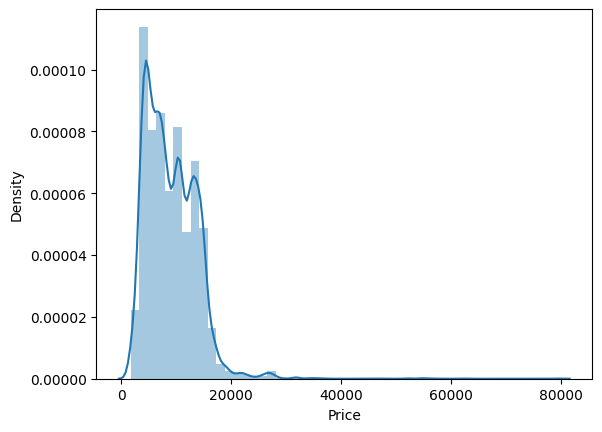

In [20]:
#• Visualize the distribution of: Prices, Duration, Total Stops.
sns.distplot(df['Price'])
plt.show()


/tmp/ipython-input-733992120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


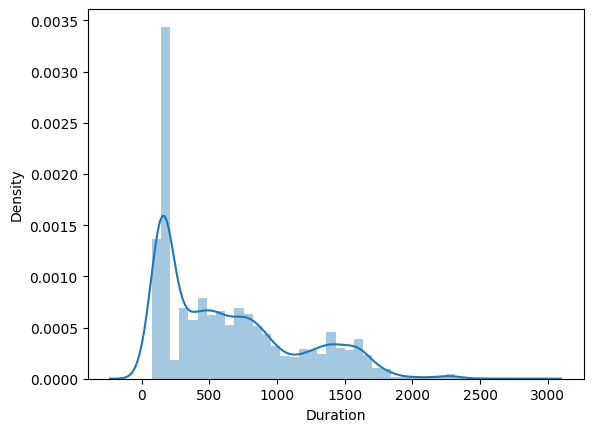

In [21]:
sns.distplot(df['Duration'])
plt.show()

/tmp/ipython-input-2595365706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Stops'])


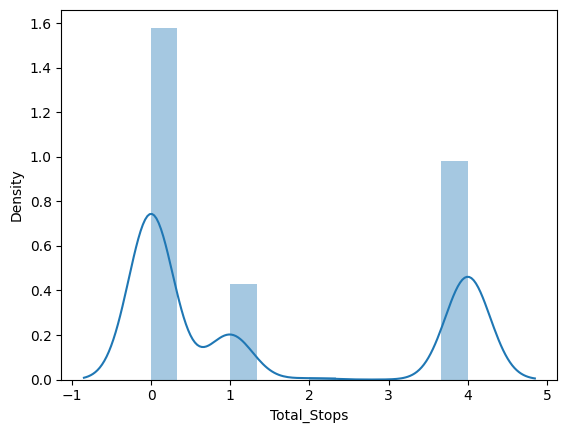

In [22]:
sns.distplot(df['Total_Stops'])
plt.show()

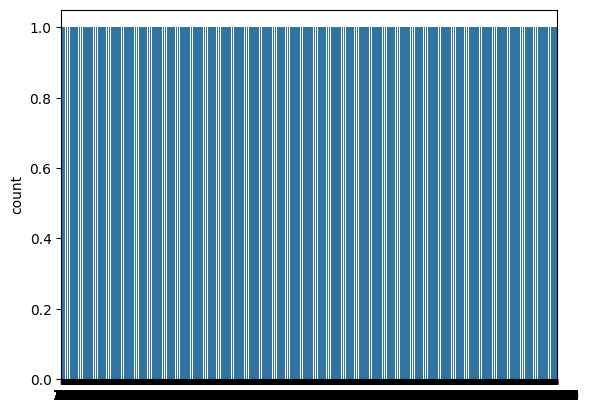

In [23]:
#• Count plot of flights per Airline, Source, and Destination.
sns.countplot(df['Airline'])
plt.show()

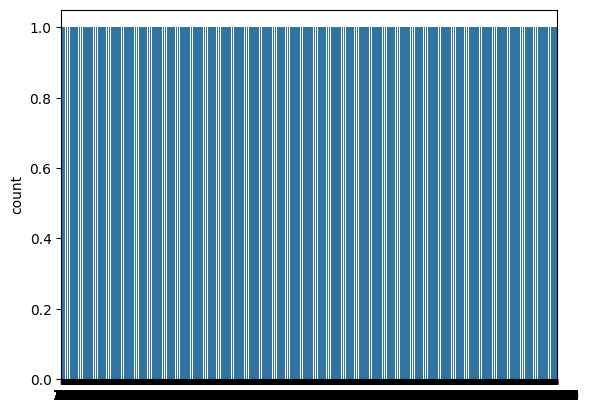

In [24]:
sns.countplot(df['Source'])
plt.show()

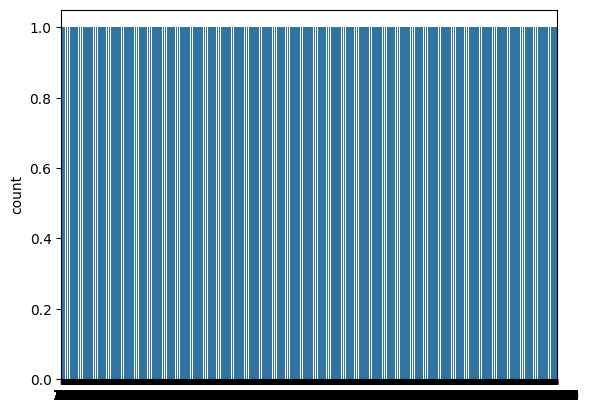

In [26]:
sns.countplot(df['Destination'])
plt.show()

📍 Part 4: Bivariate & Multivariate Analysis

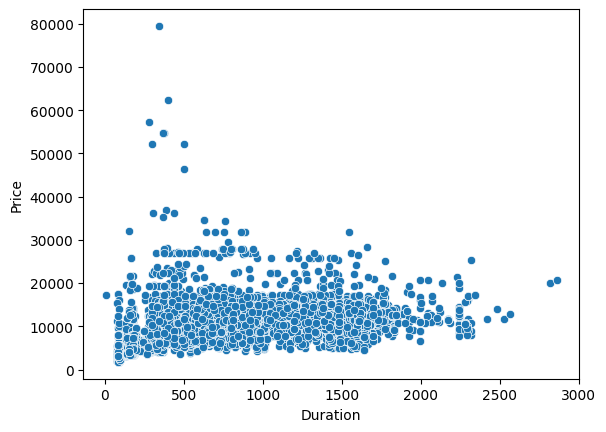

In [25]:
#• Plot Price vs. other numerical features.
sns.scatterplot(x='Duration',y='Price',data=df)
plt.show()



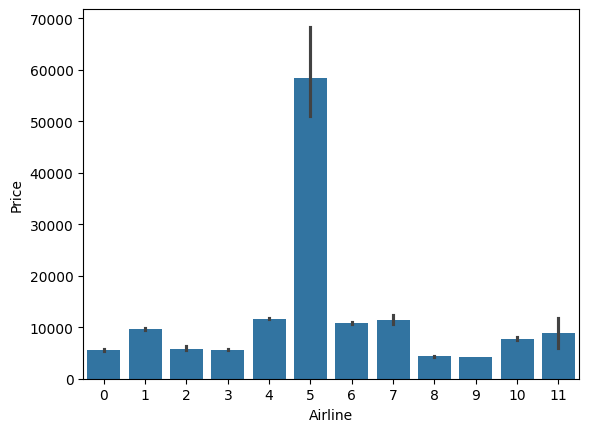

In [28]:
#• Compare average flight prices by Airline, Source-Destination pairs, Time of the day.
sns.barplot(x='Airline',y='Price',data=df)
plt.show()


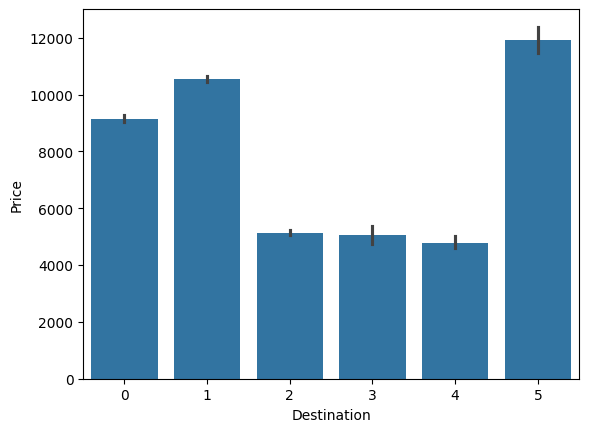

In [29]:
sns.barplot(x='Destination',y='Price',data=df)
plt.show()

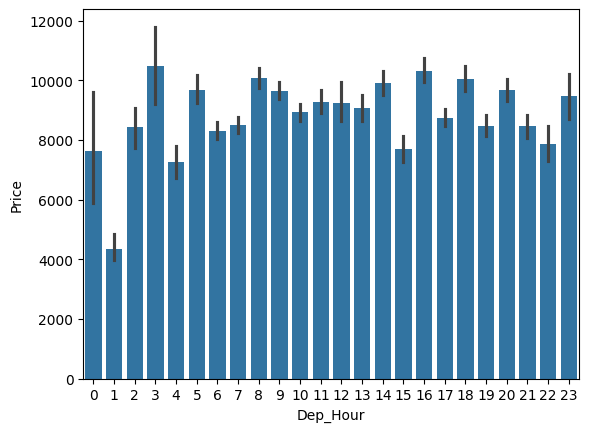

In [30]:
sns.barplot(x='Dep_Hour',y='Price',data=df)
plt.show()

In [31]:
#• Correlation heatmap for numeric features.
df=df.drop(['Route'],axis=1)
df.head(5)


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,3,0,5,170,4,8,3897,24,3,22,20
1,1,3,0,445,1,8,7662,1,5,5,50
2,4,2,1,1140,1,8,13882,9,6,9,25
3,3,3,0,325,0,8,6218,12,5,18,5
4,3,0,5,285,0,8,13302,1,3,16,50


[]

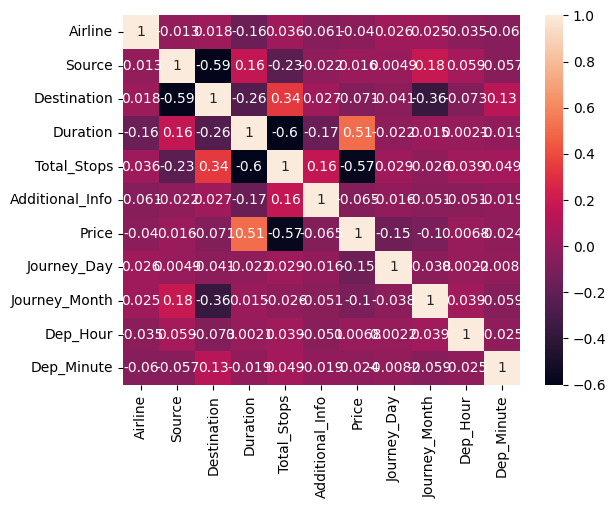

In [32]:
sns.heatmap(df.corr(),annot=True)
plt.plot()

📍 Part 6: Insights & Reporting

In [ ]:
#• List the top 5 insights derived from the analysis.

#There is a slight upward trend—as Duration increases, prices tend to increase, but not linearly.
#Some tickets with short durations (< 600 minutes) have extremely high prices (above 50,000).
#These might be business class tickets or last-minute bookings.
#Most prices cluster between 5,000–20,000, regardless of duration.
#Beyond ~1500 minutes, price variation decreases—possibly indicating longer flights don’t always cost more.

In [ ]:
#• Discuss potential factors influencing flight prices.

#Consider checking for outliers or premium flight categories.
#Include Duration and Total_Stops as key features in any price prediction model.
#Perform outlier detection on price to remove extremely high-priced flights with short durations.
#Investigate additional features like Airline, Class, or Days to Departure to improve model accuracy, since current variables show limited correlation with price.

In [ ]:
#• Provide suggestions for travelers based on your findings.

#Check for flights on early ours in the morning
# Avoid airlines 5
# Avoid destination 5
# Try to find non stop flights or more than 3